In [3]:
import matplotlib.pyplot as plt
from endfiresim.wave import CWaveModelSpheric
from endfiresim.sensor import CCardioidIdeal
import numpy as np

Effective gain (1) for incident direction:  -0.97 dB
Effective gain (2) for incident direction:  3.01 dB


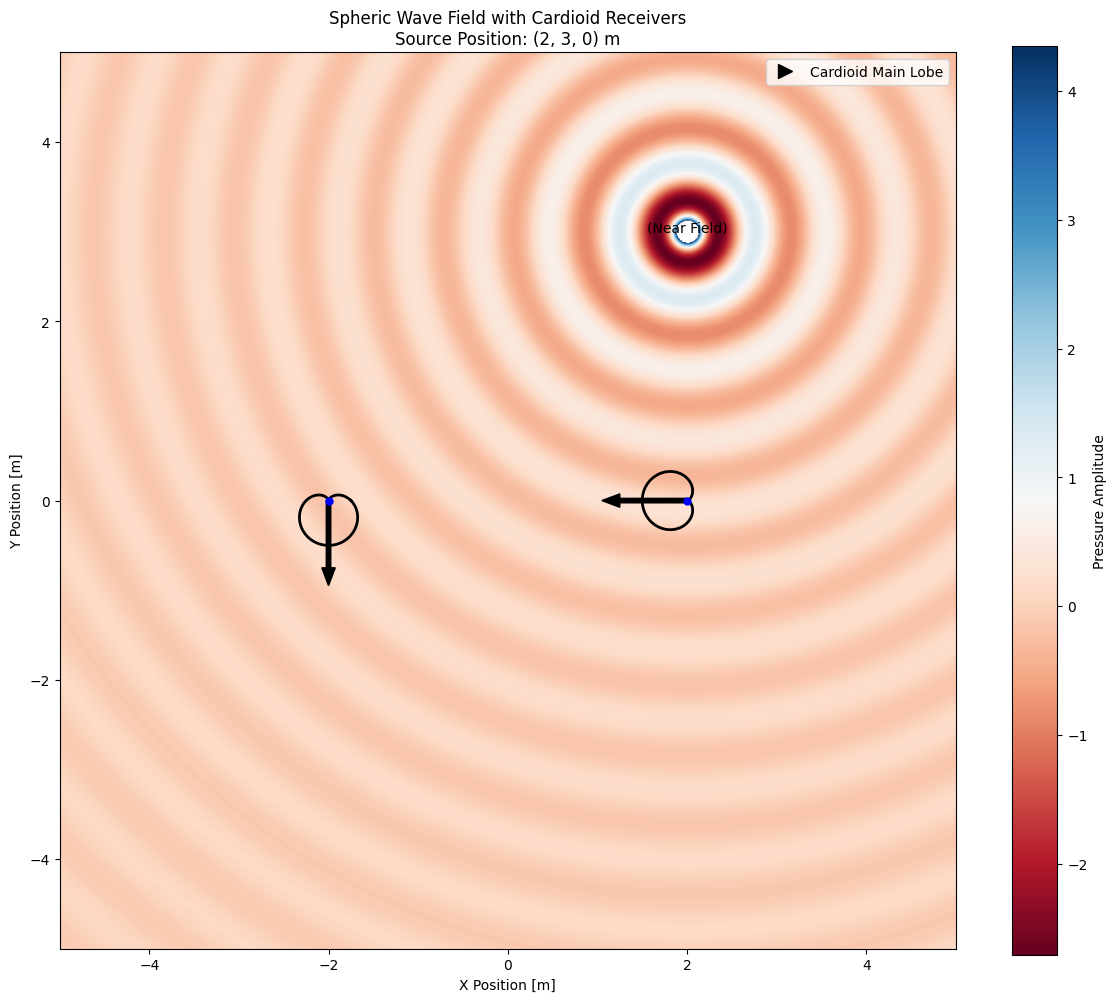

In [4]:
# Basic properties
freq = 440
azim_cardioid1 = -np.pi/2
azim_cardioid2 = np.pi
fs = 48000
dur = 1.0

# Scenario objects
ts = np.arange(0, dur, 1/fs)
cardioid_pos = (0, 0)  # Position of cardioid in the plot
cardioid1 = CCardioidIdeal((-2, 0, 0), np.pi/2, azim_cardioid1)
cardioid2 = CCardioidIdeal((2, 0, 0), np.pi/2, azim_cardioid2)
sw = CWaveModelSpheric(freq, source_xyz=(2, 3, 0))
signal1, gain1 = cardioid1.receive(sw, ts)
signal2, gain2 = cardioid2.receive(sw, ts)

# Computed gain for incident
gain1 = 20*np.log10(gain1)
gain2 = 20*np.log10(gain2)
print("Effective gain (1) for incident direction: ", np.round(gain1, 2), "dB")
print("Effective gain (2) for incident direction: ", np.round(gain2, 2), "dB")

# Entire wave as heatmap
x = np.linspace(-5, 5, 1000)
x, y = np.meshgrid(x, x)
z = np.zeros_like(x)
p = sw.p(0, (x, y, z))

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(np.real(p), 
               extent=[x.min(), x.max(), y.min(), y.max()],
               cmap='RdBu', 
               origin='lower')

cardioid1.to_plot(ax)
cardioid2.to_plot(ax)

ax.set_xlabel('X Position [m]')
ax.set_ylabel('Y Position [m]')
ax.set_title(f'Spheric Wave Field with Cardioid Receivers\n'
             f'Source Position: {sw.source_xyz} m')
plt.colorbar(im, label='Pressure Amplitude')
ax.set_aspect('equal')
cardioid_arrow = plt.Line2D([0], [0], color='k', marker='>', linestyle='None',
                           markersize=10, label='Cardioid Main Lobe')
ax.legend(handles=[cardioid_arrow])
ax.annotate("(Near Field)", sw.source_xyz[:2], ha="center")

plt.tight_layout()
plt.show()